<a href="https://colab.research.google.com/github/dinesh-raja1/dinesh-raja1/blob/main/corona_virus_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
covid = pd.read_csv('covid_19_india.csv')

In [ ]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [31]:
covid.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
covid['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli'], dtype=object)

In [7]:
df=covid.loc[(covid['State/UnionTerritory']=='Tamil Nadu')]

In [ ]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
61,62,2020-03-07,6:00 PM,Tamil Nadu,1,0,0,0,1
67,68,2020-03-08,6:00 PM,Tamil Nadu,1,0,0,0,1
79,80,2020-03-09,6:00 PM,Tamil Nadu,1,0,0,0,1
94,95,2020-03-10,6:00 PM,Tamil Nadu,1,0,0,0,1
105,106,2020-03-11,6:00 PM,Tamil Nadu,1,0,0,0,1


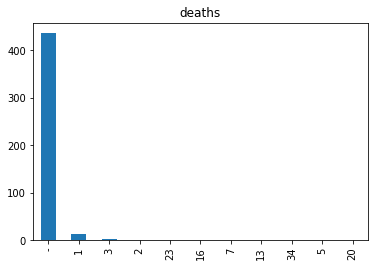

In [32]:
df['ConfirmedIndianNational'].value_counts().plot(kind='bar',title='deaths')
plt.show()

In [5]:
import plotly.offline as py 
import plotly.graph_objs as go

In [9]:
cured_rate=go.Scatter(x=df['Date'],y=df['Cured'],name='Cured_Rate')
death_rate=go.Scatter(x=df['Date'],y=df['Deaths'],name='Death_Rate')
py.iplot([cured_rate,death_rate])

In [18]:
 df1=df[['Confirmed']]

In [19]:
df1=df1.values

In [26]:
type(df1)

numpy.ndarray

In [27]:
train_size=int(len(df1)*0.80)  
test_size= len(df1)-train_size

In [28]:
train,test=df1[0:train_size,:],df1[train_size:len(df1),:]

In [40]:
def create_dataset(dataset,look_back=1):
  datax,datay=[],[]
  for i in range(len(dataset)-look_back-1):
    a=dataset[i:(i+look_back),0]
    datax.append(a)
    datay.append(dataset[i+look_back,0])
  return np.array(datax),np.array(datay)


In [42]:
look_back=2
trainx,trainy=create_dataset(train,look_back=look_back)
testx,testy=create_dataset(test,look_back=look_back)

In [37]:
from sklearn.linear_model import LinearRegression

In [43]:
model=LinearRegression()

In [44]:
model.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
trainx

array([[     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      2],
       [     2,      3],
       [     3,      3],
       [     3,      7],
       [     7,      9],
       [     9,     15],
       [    15,     18],
       [    18,     26],
       [    26,     29],
       [    29,     40],
       [    40,     49],
       [    49,     67],
       [    67,     74],
       [    74,    234],
       [   234,    234],
       [   234,    309],
       [   309,    411],
       [   411,    485],
       [   485,    571],
       [   571,    621],
       [   621,    690],
       [   690,    738],
       [   738,    834],
       [   834,    911],
       [   911,    969],
       [   969,   1075],
       [  1075,   1173],
       [  1173,   1204],
       [  1204,   1242],


In [49]:
predict1=model.predict(testx)

In [52]:
df=pd.DataFrame({'actual':testy.flatten(),'predicted':predict1.flatten()})

In [53]:
df

,actual,predicted
0,856246,8.567861e+05
1,856917,8.562188e+05
2,858272,8.575588e+05
3,858967,8.595957e+05
4,859726,8.596326e+05
...,...,...
84,2148346,2.149335e+06
85,2172751,2.173457e+06
86,2195402,2.196951e+06
87,2216812,2.217851e+06


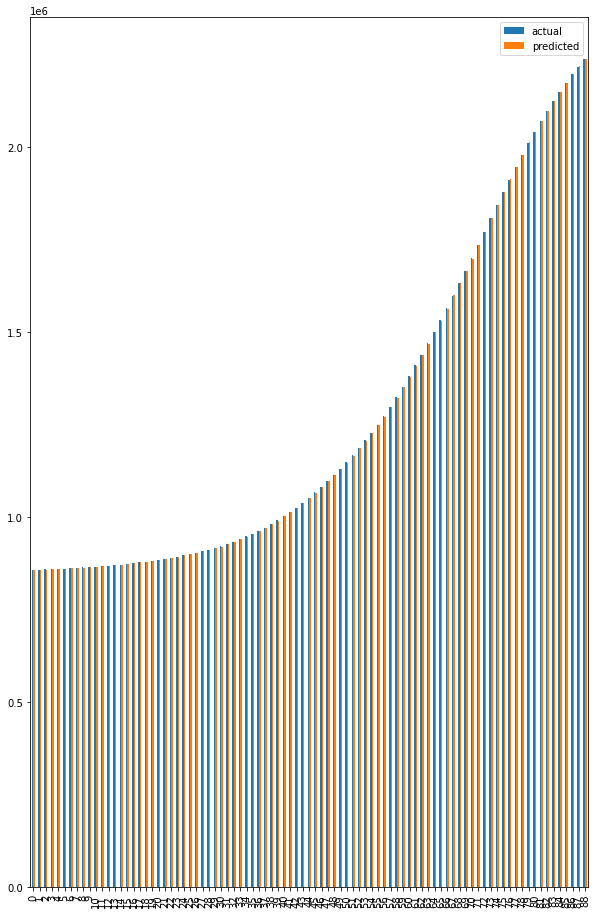

In [75]:
df.plot(kind='bar',figsize=(10,16))